In [21]:

from datetime import datetime
from collections import Counter
import pandas as pd

#Bibliotecas matemáticas e estatísticas
import numpy as np
from scipy.stats import spearmanr
import statistics as sts
from scipy import stats as s

#Pacotes de machine learning e estatística
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

#Bibliotecas de visualização
from matplotlib import pyplot as plt
import seaborn as sns

## 2 Números índices
Este conceito do ponto de vista de cálculos é simples, mas trabalhoso, por isso o foco do estudo recomendado é mais a leitura do capítulo do livro para entendimento.

Referência: TOLEDO, Geraldo Luciano e OVALLE, Ivo Izidório (1985) Estatítisca Básica. São Paulo: Atlas

Detalhes no capítulo 7 do livro

Propriedades de números índices:

1. Identidade: o número-índice deve ser igual à unidade quando a época dada (t) coincidir com a época básica (0).
2. Reversão (inversão) de tempo: se permutarem dois períodos s e t, os resultados são o inverso um do outro.
3. Circular: "considerando um índice em que as datas aparecem em progressão aritimética e cujas comparações foram feitas com base nas datas imediatamente anteriores, o valor do índice da última data, com base na primeira, será igual ao produto dos valores da série original" (Toledo e Ovale, 1985)

In [22]:
#Mudança de base
anos = list(range(1957, 1969))
ind_producao_industrial = [100, 104, 97, 112, 120, 124,
                           134, 125, 139, 143, 143, 134]
base = 1957

print(f'Série original - Base: ano {base}')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(anos)):
  print(anos[k],
        ind_producao_industrial[k],
        sep=' : ')
     

Série original - Base: ano 1957
Ano  : Índice
1957 : 100
1958 : 104
1959 : 97
1960 : 112
1961 : 120
1962 : 124
1963 : 134
1964 : 125
1965 : 139
1966 : 143
1967 : 143
1968 : 134


In [23]:
#Definição da nova base de referência dos índices
nova_base = 1961
posicao_nb = anos.index(nova_base)
posicao_nb

print(anos[posicao_nb],
      ind_producao_industrial[posicao_nb]
)

val_novaBase = ind_producao_industrial[posicao_nb]
val_novaBase

1961 120


120

In [24]:
"""
Para manuntenção da coerência dos índices esta forma de ajuste só é válida
quando o método de cálculo original dos número-índice respeita a terceira
proprieda (Circular) de números-índices
"""
novos_indices = [round((ind_producao_industrial[k] / val_novaBase) * 100) for
                 k in range(0, len(anos))]
novos_indices

print(f'Série ajustada - Base: ano {nova_base}')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(anos)):
  print(anos[k],
        novos_indices[k],
        sep=' : ')

Série ajustada - Base: ano 1961
Ano  : Índice
1957 : 83
1958 : 87
1959 : 81
1960 : 93
1961 : 100
1962 : 103
1963 : 112
1964 : 104
1965 : 116
1966 : 119
1967 : 119
1968 : 112


In [25]:
anos_serie1 = list(range(1970, 1976))
anos_serie2 = list(range(1975, 1981))

serie1 = [100, 90, 108, 160, 196, 200]
serie2 = [100, 120, 160, 210, 240, 250]

print('Série 1')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(serie1)):
  print(anos_serie1[k],
        serie1[k],
        sep=' : ')
  
print('Série 2')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(serie2)):
  print(anos_serie2[k],
        serie2[k],
        sep=' : ')

Série 1
Ano  : Índice
1970 : 100
1971 : 90
1972 : 108
1973 : 160
1974 : 196
1975 : 200
Série 2
Ano  : Índice
1975 : 100
1976 : 120
1977 : 160
1978 : 210
1979 : 240
1980 : 250


In [26]:
#Ajuste
#Série novas é mantida inalterada
#Série 1 é ajustada com base no ano/período de encontro das duas séries (1975)
serie1N = [round(serie1[k] / serie1[-1] * serie2[0]) for
           k in range(0, len(serie1))]
serie1N

anos_serieN = list(range(1970, 1981))
serieN = serie1N[:-1] + serie2


print('Série Completa')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(serieN)):
  print(anos_serieN[k],
        serieN[k],
        sep=' : ')

Série Completa
Ano  : Índice
1970 : 50
1971 : 45
1972 : 54
1973 : 80
1974 : 98
1975 : 100
1976 : 120
1977 : 160
1978 : 210
1979 : 240
1980 : 250


## 3 Deflatores e poder aquisitivo

In [27]:
anos = list(range(1975, 1981))
faturamento = [1600000,
               1800000,
               2400000,
               2800000,
               3000000,
               3200000]
indice_precos = [100, 120, 150, 160, 180, 187]

print('Faturamento - Valores nominais')
print('Ano ',
      'Valor  ',
      'Índice de Preços',
      sep=' : ')

for k in range(0, len(anos)):
  print(anos[k],
        faturamento[k],
        indice_precos[k],
        sep=' : ')

Faturamento - Valores nominais
Ano  : Valor   : Índice de Preços
1975 : 1600000 : 100
1976 : 1800000 : 120
1977 : 2400000 : 150
1978 : 2800000 : 160
1979 : 3000000 : 180
1980 : 3200000 : 187


In [28]:
"""
Calculando preço deflacionado
Definido o ano base para deflacionamento, fazemos o seguinte:
* (valor / indice_atual) * indice_base:
  valor = valor a ser deflacionado
  indice_atual = indice do período relativo ao valor a ser deflacionado
  indice_base = indice do período escolhido como base
"""
fat_deflacionado = [(faturamento[k] / indice_precos[k]) * indice_precos[0] for
    k in range(0, len(anos))]

print(f'Faturamento - Falores deflacionados com base em {indice_precos[0]}')
print('Ano ',
      'Valor  ',
      'Índice de Preços',
      sep=' : ')

for k in range(0, len(anos)):
  print(anos[k],
        round(fat_deflacionado[k]),
        indice_precos[k],
        sep=' : ')

Faturamento - Falores deflacionados com base em 100
Ano  : Valor   : Índice de Preços
1975 : 1600000 : 100
1976 : 1500000 : 120
1977 : 1600000 : 150
1978 : 1750000 : 160
1979 : 1666667 : 180
1980 : 1711230 : 187


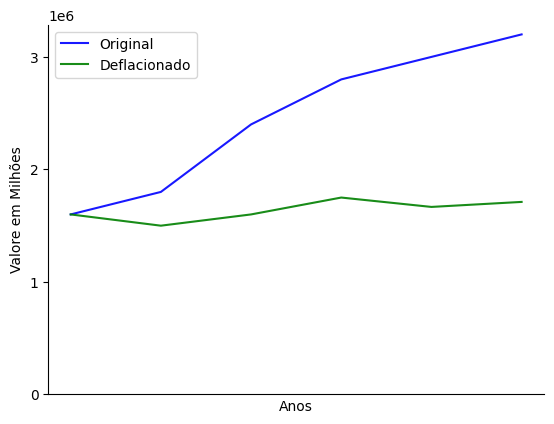

In [29]:
plt.plot(faturamento, color='b', alpha=0.9)
plt.plot(fat_deflacionado, color='g', alpha=0.9)
plt.legend(['Original', 'Deflacionado'])
plt.yticks([0, 1000000, 2000000, 3000000])
plt.xticks([])
plt.title('')
plt.ylabel('Valore em Milhões')
plt.xlabel('Anos')
sns.despine()

In [30]:
"""
Cálculo de evolução real do faturamento
Definido o ano base para deflacionamento, fazemos o seguinte:
* (valor_atual_deflacionado / valor base) * 100
"""
evolucao_real = [fat_deflacionado[k] / fat_deflacionado[0] * 100 for
                k in range(0, len(anos))]

evolucao_real

[100.0, 93.75, 100.0, 109.375, 104.16666666666667, 106.951871657754]

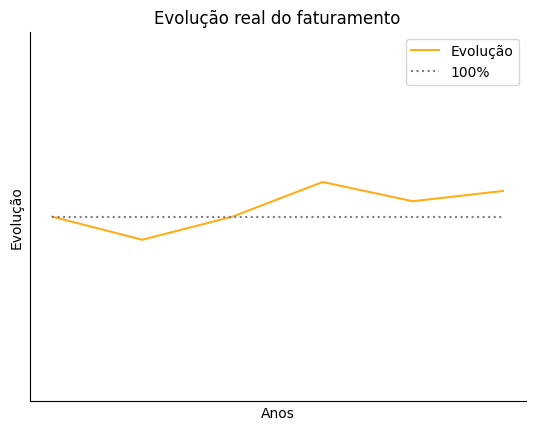

In [31]:
plt.plot(evolucao_real, color='orange', alpha=0.9)
plt.plot([100 for k in range(0, len(anos))], color='gray', ls=':')
plt.legend(['Evolução', '100%'])
plt.ylim((50, 150))
plt.yticks([])
plt.xticks([])
plt.title('')
plt.title('Evolução real do faturamento')
plt.ylabel('Evolução')
plt.xlabel('Anos')
sns.despine()

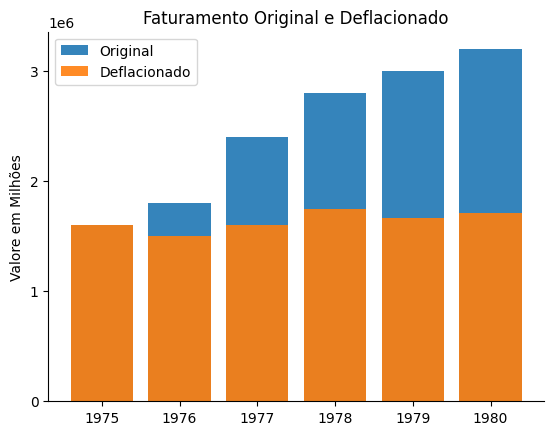

In [32]:
plt.bar(anos, height=faturamento, alpha=0.9)
plt.bar(anos, fat_deflacionado, alpha=0.9)
plt.legend(['Original', 'Deflacionado'])
plt.yticks([0, 1000000, 2000000, 3000000])
plt.title('Faturamento Original e Deflacionado')
plt.ylabel('Valore em Milhões')
sns.despine()
     